Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/100 [00:00<?, ?it/s]


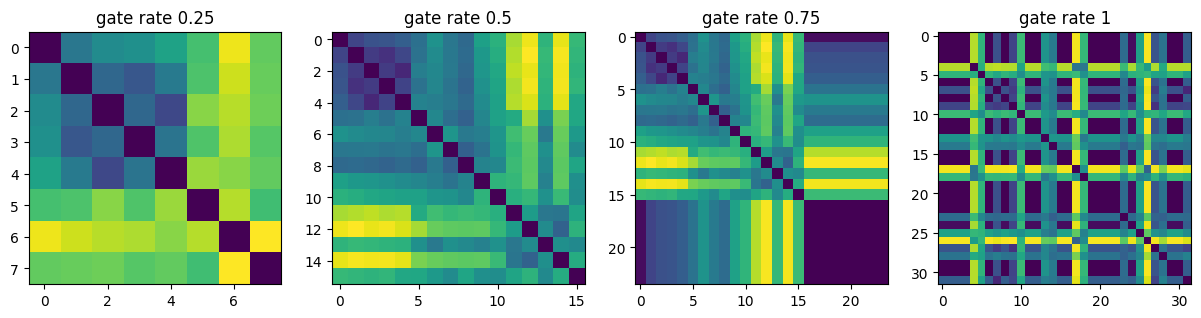

In [26]:
# here we get the feat 
# check the distribution of the gate outputs
# load the dataset
from Dataloaders.dataloader_cifar10 import Dataloader_cifar10
_, test, classes = Dataloader_cifar10(train_batch=128, test_batch=100, seed=2024)
# load the model
from Models import mobilenetv2
client, server = mobilenetv2.stupid_model_splitter(weight_path='./Weights/cifar-10/model/mobilenetv2_2024_06_20_18_05_59.pth')
# load the gate
from Models import gatedmodel
gateds = []
gated_rates = [0.25, 0.5, 0.75]
in_sizes = [8, 16, 24, 32]
from Utils import utils
ranker = utils.ranker_entropy

# get the emb from client
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

embs = []
for i, (data, target) in enumerate(tqdm(test)):
    emb = client(data)
    break
inds = []
# get the result from ranker
for i in range(3):
    s_emb, s_ind = ranker(emb.detach().cpu(), gated_rates[i])
    embs.append(s_emb)
    inds.append(s_ind)
# get the distance between each two emb

# calculate the difference between channel i and channel j for each sample and get the average
# plot subplots
fig, axs = plt.subplots(1,4, figsize=(15, 15))
for k in range(4):
    table = np.zeros((in_sizes[k], in_sizes[k]))
    if k<3:
        for i in range(in_sizes[k]):
            for j in range(in_sizes[k]):
                table[i, j] = torch.mean(torch.linalg.norm(embs[k][:, i] - embs[k][:, j])).item()
    else: # the original emb
        for i in range(in_sizes[k]):
            for j in range(in_sizes[k]):
                table[i, j] = torch.mean(torch.linalg.norm(emb[:, i] - emb[:, j])).item()
    axs[k].imshow(table)
    if k<3:
        axs[k].set_title(f'gate rate {gated_rates[k]}')
    else: # the original emb
        axs[k].set_title(f'gate rate 1')
plt.show()

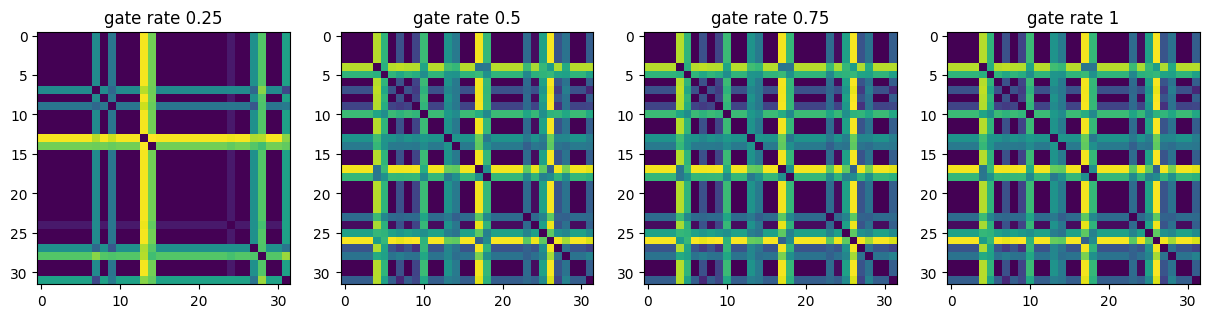

In [36]:
# add zeros to all gated embs
n_embs = []
for i in range(3):
    n_emb = torch.zeros_like(emb)
    n_emb[:, inds[i]] = embs[i]
    n_embs.append(n_emb)
# calculate the difference between each two emb

fig, axs = plt.subplots(1,4, figsize=(15, 15))
for k in range(4):
    table = np.zeros((32, 32))
    if k<3:
        for i in range(32):
            for j in range(32):
                table[i, j] = torch.mean(torch.linalg.norm(n_embs[k][:, i] - n_embs[k][:, j])).item()
    else: # the original emb
        for i in range(32):
            for j in range(32):
                table[i, j] = torch.mean(torch.linalg.norm(emb[:, i] - emb[:, j])).item()
    axs[k].imshow(table)
    if k<3:
        axs[k].set_title(f'gate rate {gated_rates[k]}')
    else: # the original emb
        axs[k].set_title(f'gate rate 1')

# the fact is that the last layer of the client is relu
# we can see that 16, 16, 16, 16, 16, 16, 16, which means that 50% channels are activated and 50% channels are not activated

In [50]:
rest = emb - n_embs[0]
rest

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         ...,

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 

In [45]:
# I want to know how many channels are not zero
# count = []
# for i, e in enumerate(emb):
#     # if e is not zeros
#     count.append(0)
#     for ee in e:
#         if torch.sum(ee).item() != 0:
#             count[i] += 1
# print(count)
# output: [16, 16, 16, 16, 16, 16, 16, 16, 1]

In [54]:
import torch
import torch.nn as nn

relu = nn.ReLU(inplace=True)
t = torch.arange(-10, 10, 1)
relu(t)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [62]:
client, server = mobilenetv2.stupid_model_splitter(weight_path='./Weights/cifar-10/model/MobileNetV2.pth')

# get the emb from client
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

train, test, classes = Dataloader_cifar10(train_batch=1, test_batch=100, seed=2024)
# get the first train data

for i, (data, target) in enumerate(tqdm(train)):
    # data b,c,h,w
    # target b
    break

emb = client(data).detach().cpu() # b, e, h, w
print(sum(emb[0,1].flatten()))
# get the result from ranker
for i in range(3):
    s_emb, s_ind = ranker(emb, gated_rates[i])
    embs.append(s_emb)
    inds.append(s_ind)
# add zeros to all gated embs
n_embs = []
for i in range(3):
    n_emb = torch.zeros_like(emb)
    n_emb[:, inds[i]] = embs[i]
    n_embs.append(n_emb)


Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/50000 [00:00<?, ?it/s]

tensor(0.)


RuntimeError: shape mismatch: value tensor of shape [100, 8, 32, 32] cannot be broadcast to indexing result of shape [1, 8, 32, 32]

In [78]:
# check the client model
import torch
import torch.nn as nn
from Models import mobilenetv2

print(client)
# print the weights of the each layer
for name, param in client.named_parameters():
    print(name, param.size())

# get the three layers of the client
client, server = mobilenetv2.stupid_model_splitter(weight_path='./Weights/cifar-10/model/MobileNetV2.pth')
out = data
client.eval()
# get the first layer of the client
with torch.no_grad():
    for c in client.children():
        out = c(out)
        print(out)



MobileNetV2_Client(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
)
conv1.weight torch.Size([32, 3, 3, 3])
bn1.weight torch.Size([32])
bn1.bias torch.Size([32])
tensor([[[[-4.8443e-08,  1.9078e-07, -1.6996e-07,  ..., -2.6532e-08,
           -1.6062e-07,  7.8684e-07],
          [-1.5875e-07,  1.5788e-08, -5.8266e-07,  ...,  3.3955e-07,
           -4.8422e-07,  3.7301e-07],
          [-4.9352e-08,  3.2247e-07, -2.1584e-07,  ...,  5.8673e-07,
           -2.8657e-07,  4.7365e-07],
          ...,
          [-8.9717e-08,  1.9621e-07,  2.5327e-07,  ..., -3.0054e-07,
           -1.0891e-06, -7.6479e-08],
          [-7.7032e-07, -1.6475e-06, -1.5675e-06,  ..., -1.3646e-06,
           -1.8308e-06, -1.0250e-06],
          [ 1.4499e-06,  1.2363e-06,  1.2648e-06,  ...,  2.2446e-07,
           -2.2601e-07, -1.3199e-07]],

         [[ 1.9705e-